In [1]:

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [13]:
batch_size = 128
Z_dim = 100
max_iter = 100000
mnist = input_data.read_data_sets('/data/examples/MNIST_data',one_hot=True)

Extracting /data/examples/MNIST_data/train-images-idx3-ubyte.gz
Extracting /data/examples/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /data/examples/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /data/examples/MNIST_data/t10k-labels-idx1-ubyte.gz


# train

In [37]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.0)
    return tf.random_normal(shape=size, stddev=xavier_stddev)
    
def generator(z):
    with tf.variable_scope('generator',reuse=tf.AUTO_REUSE):
        with tf.variable_scope('hidden_layer'):
            G_W1 = tf.get_variable(name='weight_1',dtype=tf.float32,initializer=xavier_init([100,128]))
            G_b1 = tf.get_variable(name='bias_1',dtype=tf.float32,initializer=xavier_init([128]))
            G_h1 = tf.nn.relu(tf.matmul(z,G_W1)+G_b1)
            
        with tf.variable_scope('output_layer'):
            G_W2 = tf.get_variable(name='weight_2',dtype=tf.float32,initializer=xavier_init([128,784]))
            G_b2 = tf.get_variable(name='bias_2',dtype=tf.float32,initializer=xavier_init([784]))
            G_prob = tf.nn.sigmoid(tf.matmul(G_h1,G_W2)+G_b2)
    return G_prob
    
def discriminator(x):
    with tf.variable_scope('discriminator',reuse=tf.AUTO_REUSE):
        with tf.variable_scope('hidden_layer'):
            D_W1 = tf.get_variable(name='weight_1',dtype=tf.float32,initializer=xavier_init([784,128]))
            D_b1 = tf.get_variable(name='bias_1',dtype=tf.float32,initializer=xavier_init([128]))
            D_h1 = tf.nn.relu(tf.matmul(x,D_W1)+D_b1)
        with tf.variable_scope('output_layer'):
            D_W2 = tf.get_variable(name='weight_2',dtype=tf.float32,initializer=xavier_init([128,1]))
            D_b2 = tf.get_variable(name='bias_2',dtype=tf.float32,initializer=xavier_init([1]))
            D_logit = tf.matmul(D_h1,D_W2)+D_b2
            D_prob = tf.nn.sigmoid(D_logit)
    return D_prob,D_logit


In [38]:
main_graph = tf.Graph()
sess = tf.Session(graph = main_graph)

with main_graph.as_default():
    
    Z = tf.placeholder(name='z',dtype=tf.float32,shape=[None,100])
    input_img = tf.placeholder(name='real_img',dtype=tf.float32,shape=[None,784])
    
    G_sample = generator(Z)
    D_real, D_logit_real = discriminator(input_img)
    D_fake, D_logit_fake = discriminator(G_sample)
    
    D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real,labels=tf.ones_like(D_logit_real)))
    D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake,labels=tf.zeros_like(D_logit_fake)))
    
    
    D_loss = D_loss_real + D_loss_fake
    G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake,labels=tf.ones_like(D_logit_fake)))
    
    
    varList = tf.trainable_variables()
    G_varList = [ var for var in varList if 'generator' in var.name]
    D_varList = [var for var in varList if 'discriminator' in var.name]
    
    D_optimizer = tf.train.AdamOptimizer().minimize(D_loss,var_list=D_varList)
    G_optimizer = tf.train.AdamOptimizer().minimize(G_loss,var_list=G_varList)
    
    init = tf.global_variables_initializer()
    

In [39]:

sess.run(init)

In [40]:
# sess=tf.Session()
# print(sess.run(tf.ones_like([1,2,3])))
# sess.close()

In [41]:
def sample_Z(m,n):
    return np.random.uniform(-1.,1.,size=[m,n])

def plot(samples):
    fig = plt.figure(figsize=(4,4))
    gs = gridspec.GridSpec(4,4)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
        
    return fig

Iter: 0
D_loss: 1.9203237295150757
G_loss: 2.8819689750671387


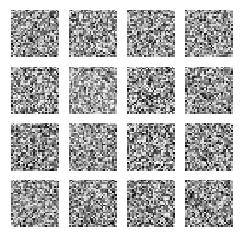

------------------------
Iter: 1000
D_loss: 0.011205493472516537
G_loss: 8.651841163635254


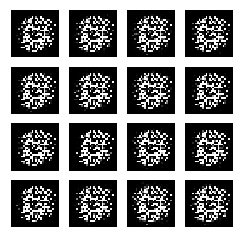

------------------------
Iter: 2000
D_loss: 0.006138020195066929
G_loss: 8.059243202209473


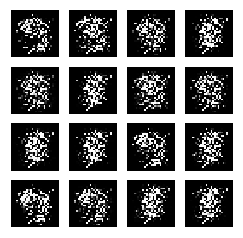

------------------------
Iter: 3000
D_loss: 0.01851237192749977
G_loss: 7.259703636169434


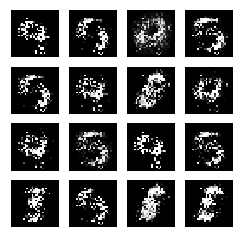

------------------------
Iter: 4000
D_loss: 0.0659041628241539
G_loss: 5.664572715759277


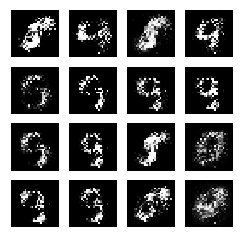

------------------------
Iter: 5000
D_loss: 0.10019883513450623
G_loss: 6.46157693862915


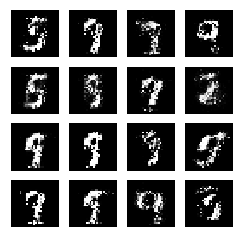

------------------------
Iter: 6000
D_loss: 0.0981287807226181
G_loss: 5.663179397583008


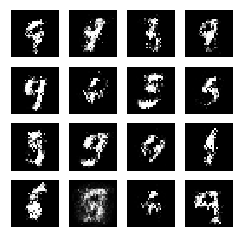

------------------------
Iter: 7000
D_loss: 0.19124986231327057
G_loss: 4.3130879402160645


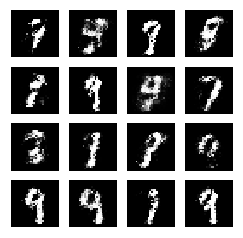

------------------------
Iter: 8000
D_loss: 0.23624765872955322
G_loss: 4.463865280151367


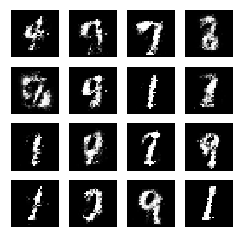

------------------------
Iter: 9000
D_loss: 0.3731902241706848
G_loss: 3.621690034866333


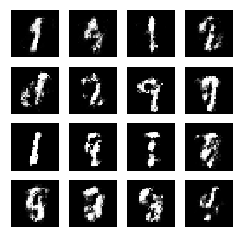

------------------------
Iter: 10000
D_loss: 0.45861127972602844
G_loss: 3.2608706951141357


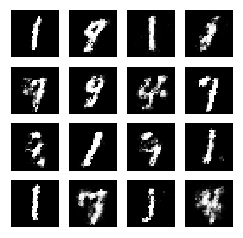

------------------------
Iter: 11000
D_loss: 0.6665273904800415
G_loss: 2.518404006958008


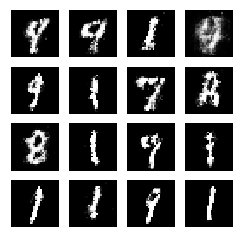

------------------------
Iter: 12000
D_loss: 0.5109176635742188
G_loss: 3.3403749465942383


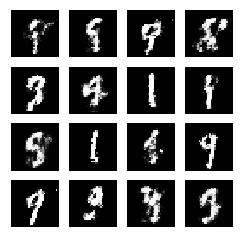

------------------------
Iter: 13000
D_loss: 0.4368533790111542
G_loss: 2.7404870986938477


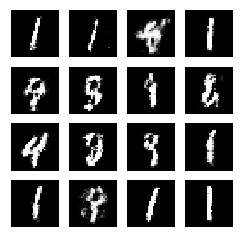

------------------------
Iter: 14000
D_loss: 0.5786556005477905
G_loss: 2.3592002391815186


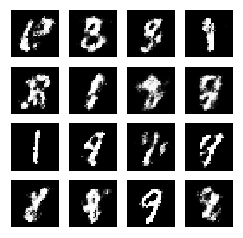

------------------------
Iter: 15000
D_loss: 0.4928838610649109
G_loss: 2.6332616806030273


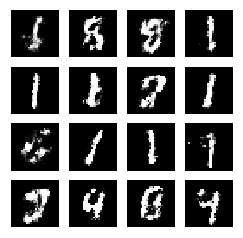

------------------------
Iter: 16000
D_loss: 0.6266574859619141
G_loss: 2.6094658374786377


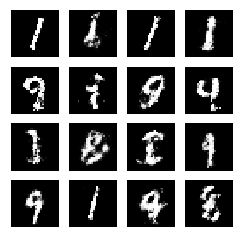

------------------------
Iter: 17000
D_loss: 0.6791272163391113
G_loss: 2.287546157836914


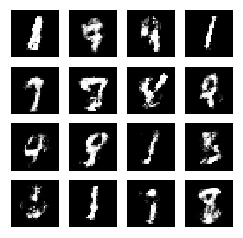

------------------------
Iter: 18000
D_loss: 0.6918513774871826
G_loss: 2.3138179779052734


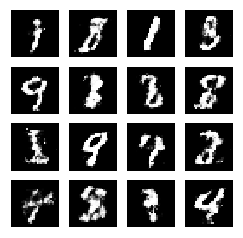

------------------------
Iter: 19000
D_loss: 0.46026962995529175
G_loss: 2.3206686973571777


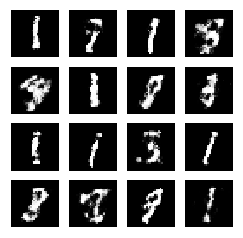

------------------------
Iter: 20000
D_loss: 0.5260171890258789
G_loss: 2.358729839324951


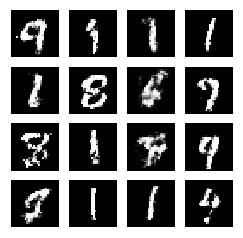

------------------------
Iter: 21000
D_loss: 0.5694973468780518
G_loss: 2.6134612560272217


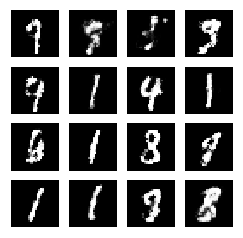

------------------------
Iter: 22000
D_loss: 0.6199572086334229
G_loss: 2.583695411682129


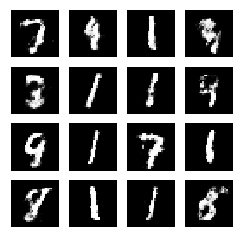

------------------------
Iter: 23000
D_loss: 0.7209153175354004
G_loss: 2.2210638523101807


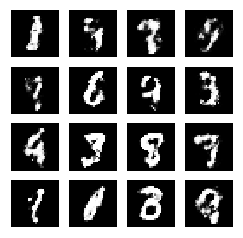

------------------------
Iter: 24000
D_loss: 0.4533160626888275
G_loss: 2.6947851181030273


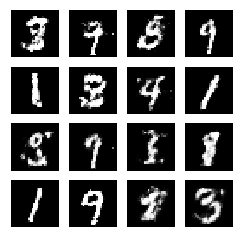

------------------------
Iter: 25000
D_loss: 0.4055050313472748
G_loss: 2.498607635498047


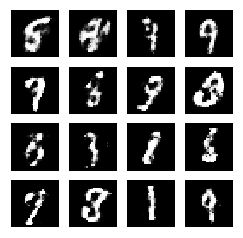

------------------------
Iter: 26000
D_loss: 0.4677376449108124
G_loss: 2.771761894226074


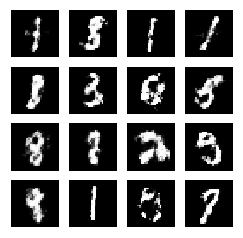

------------------------
Iter: 27000
D_loss: 0.4671790897846222
G_loss: 2.6051414012908936


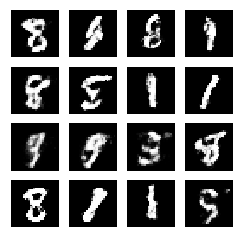

------------------------


KeyboardInterrupt: 

In [42]:
for it in range(max_iter):
    X, _ = mnist.train.next_batch(batch_size)
    _, D_loss_curr = sess.run([D_optimizer,D_loss],feed_dict={input_img:X,Z:sample_Z(batch_size,Z_dim)})
    _, G_loss_curr = sess.run([G_optimizer,G_loss],feed_dict={Z:sample_Z(batch_size,Z_dim)})
    
    if it % 1000==0:
        print('Iter: {}'.format(it))
        print('D_loss: {}'.format(D_loss_curr))
        print('G_loss: {}'.format(G_loss_curr))
        samples = sess.run(G_sample,feed_dict={Z:sample_Z(16,Z_dim)})
        fig = plot(samples)
        plt.show()
        plt.close(fig)

        print('------------------------')

In [ ]:
# np.random.uniform(-1,1,size=[10,10])